 
# **Problema Agrupamiento**


## Metodologia ASUM - DM

### Enfoque del problema
Construir estrategias para clientes entendiendo sus comportamietnos definidos de los datos

### Entendimiento analitico
Siseñar un experimento de agrupamiento que permita entender la cantidad y los elementos definitivos de los grupos generados para identificar diferencias entre los mismos

### Requerimientos de datos
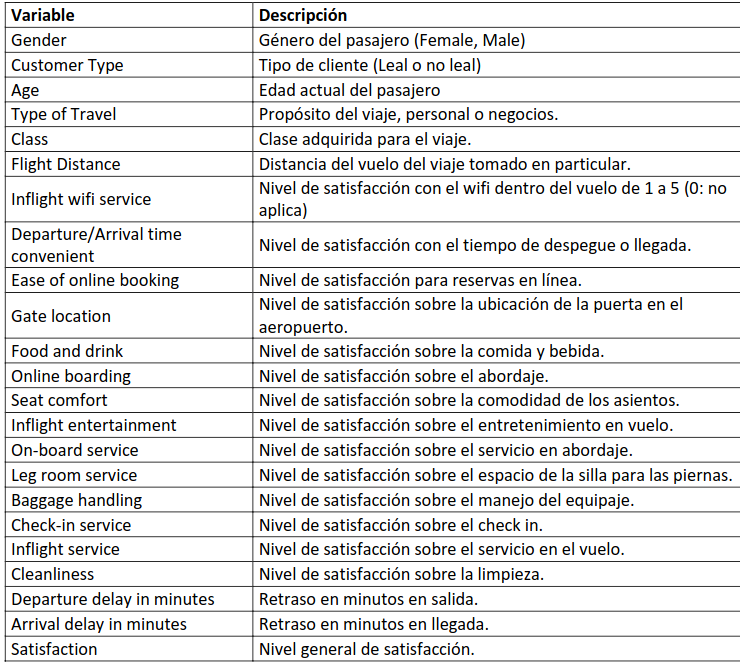

### Entedimiento de los datos
- Exploracion univariada 
- Exploracion bivariada
- Exploracion multivariada



In [3]:
# Librerias
## tratamiento de datos
import pandas as pd
import numpy as np

## visualizacion
import matplotlib.pyplot as plt
import seaborn as sb

#Advertencias
import warnings
warnings.filterwarnings("ignore")

In [4]:
data= pd.read_csv('airline_loyalty.csv')
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [5]:
# Cantidad de variables, tipo y cantidad de datos
data = data.sample(2000)
data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 3706 to 97511
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2000 non-null   int64  
 1   id                                 2000 non-null   int64  
 2   Gender                             2000 non-null   object 
 3   Customer Type                      2000 non-null   object 
 4   Age                                2000 non-null   int64  
 5   Type of Travel                     2000 non-null   object 
 6   Class                              2000 non-null   object 
 7   Flight Distance                    2000 non-null   int64  
 8   Inflight wifi service              2000 non-null   int64  
 9   Departure/Arrival time convenient  2000 non-null   int64  
 10  Ease of Online booking             2000 non-null   int64  
 11  Gate location                      2000 non-null   int64 

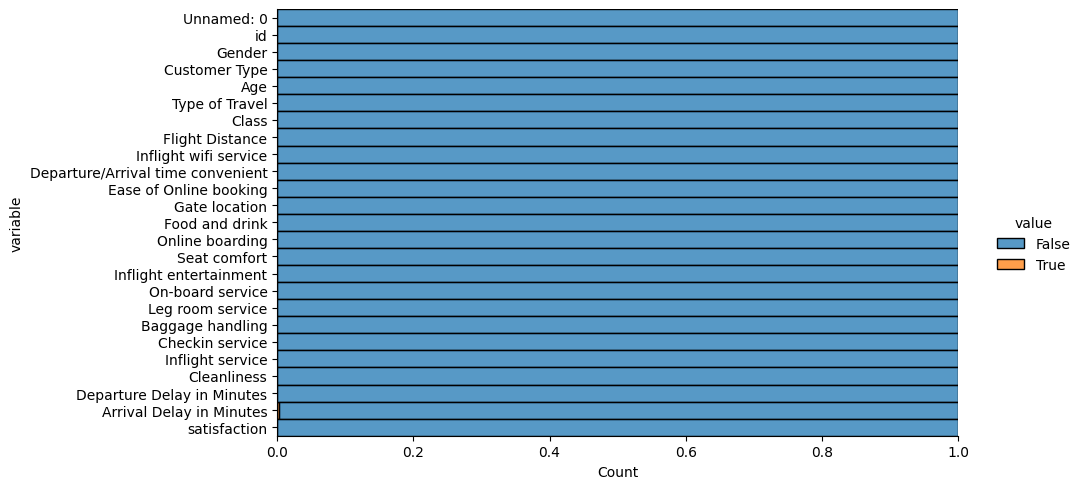

In [6]:
#Visualizacion de los datos
data.isnull().melt().pipe(lambda df: sb.displot(data=df, y='variable', hue='value', multiple='fill', aspect=2))

In [7]:
#Completar los datos nulos con la media por que es numerica
arrival_delay_min_avg = data['Arrival Delay in Minutes'].mean()
data_mod= data.copy()
data_mod['Arrival Delay in Minutes'].fillna(arrival_delay_min_avg, inplace=True)
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 3706 to 97511
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2000 non-null   int64  
 1   id                                 2000 non-null   int64  
 2   Gender                             2000 non-null   object 
 3   Customer Type                      2000 non-null   object 
 4   Age                                2000 non-null   int64  
 5   Type of Travel                     2000 non-null   object 
 6   Class                              2000 non-null   object 
 7   Flight Distance                    2000 non-null   int64  
 8   Inflight wifi service              2000 non-null   int64  
 9   Departure/Arrival time convenient  2000 non-null   int64  
 10  Ease of Online booking             2000 non-null   int64  
 11  Gate location                      2000 non-null   int64 

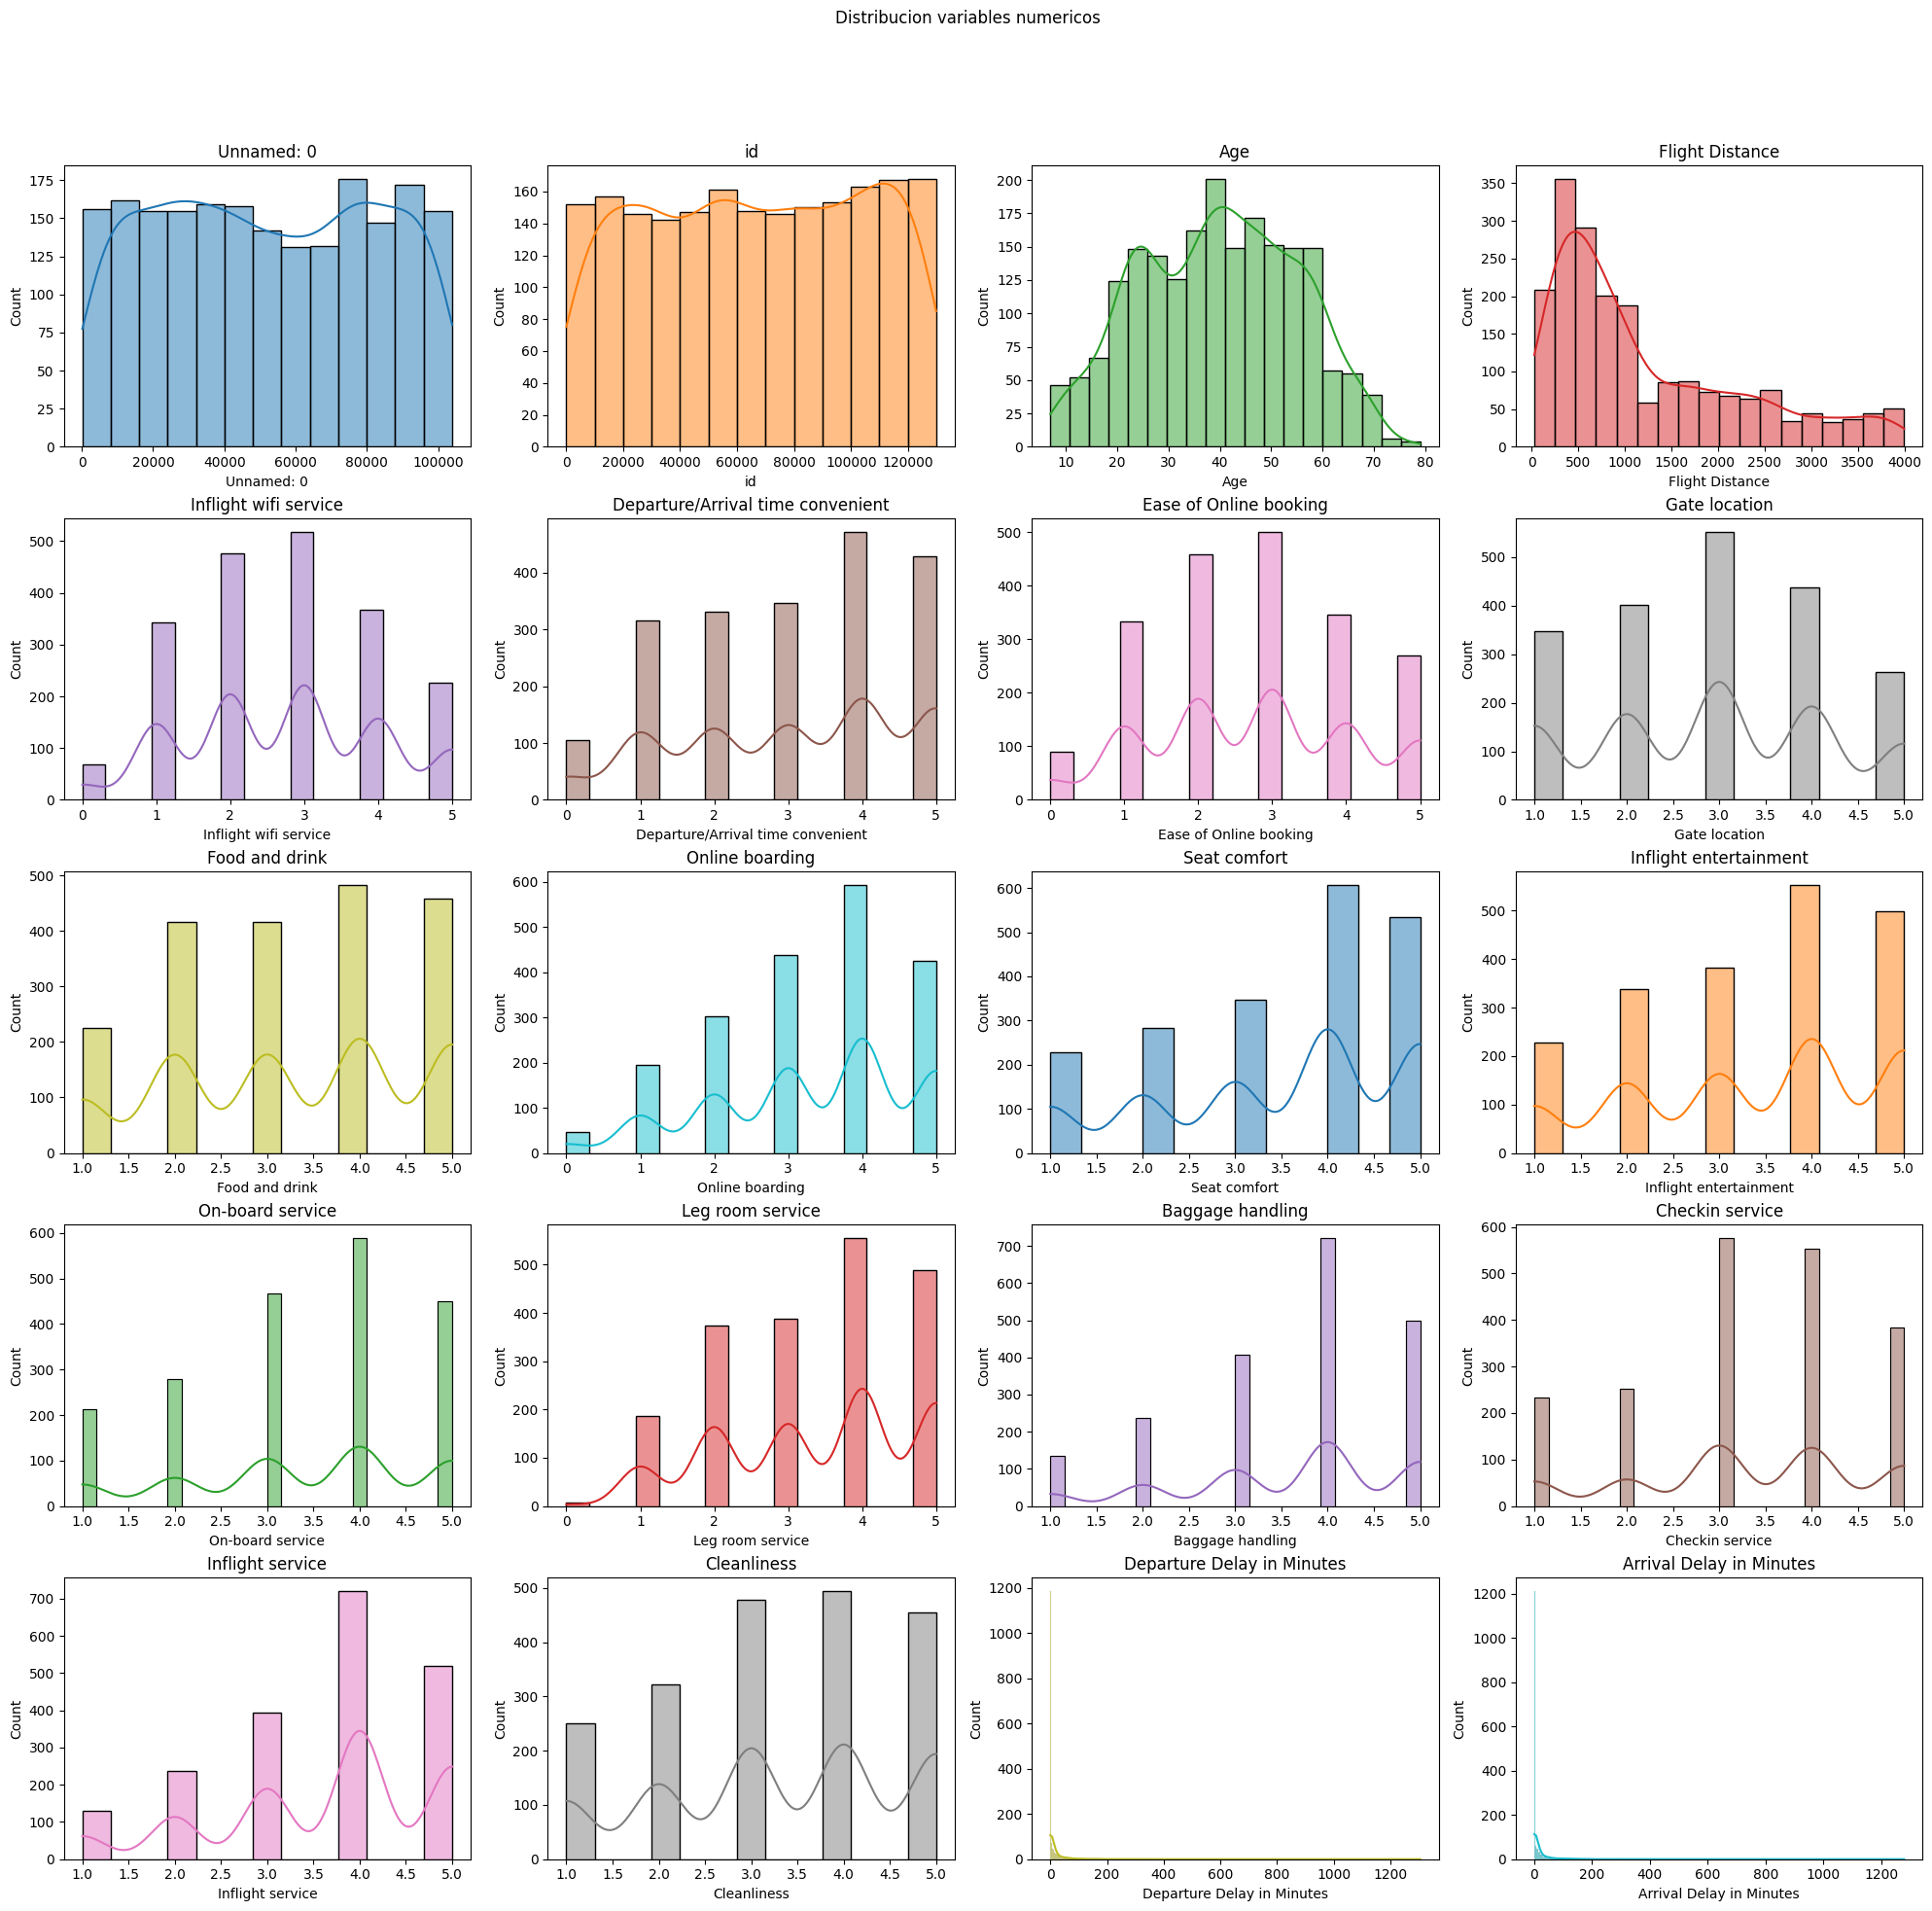

In [8]:
# Garfivos de variables numerifcas
## Histogramas de frecuecnias
fig,ax= plt.subplots(5,4, figsize=(20,20))
ax= ax.flat
num_col=data_mod.select_dtypes(include=['float64','int64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data= data_mod, x=col, kde=True, color=(list(plt.rcParams['axes.prop_cycle'])*7)[i]['color'], ax=ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Distribucion variables numericos')
plt.show()

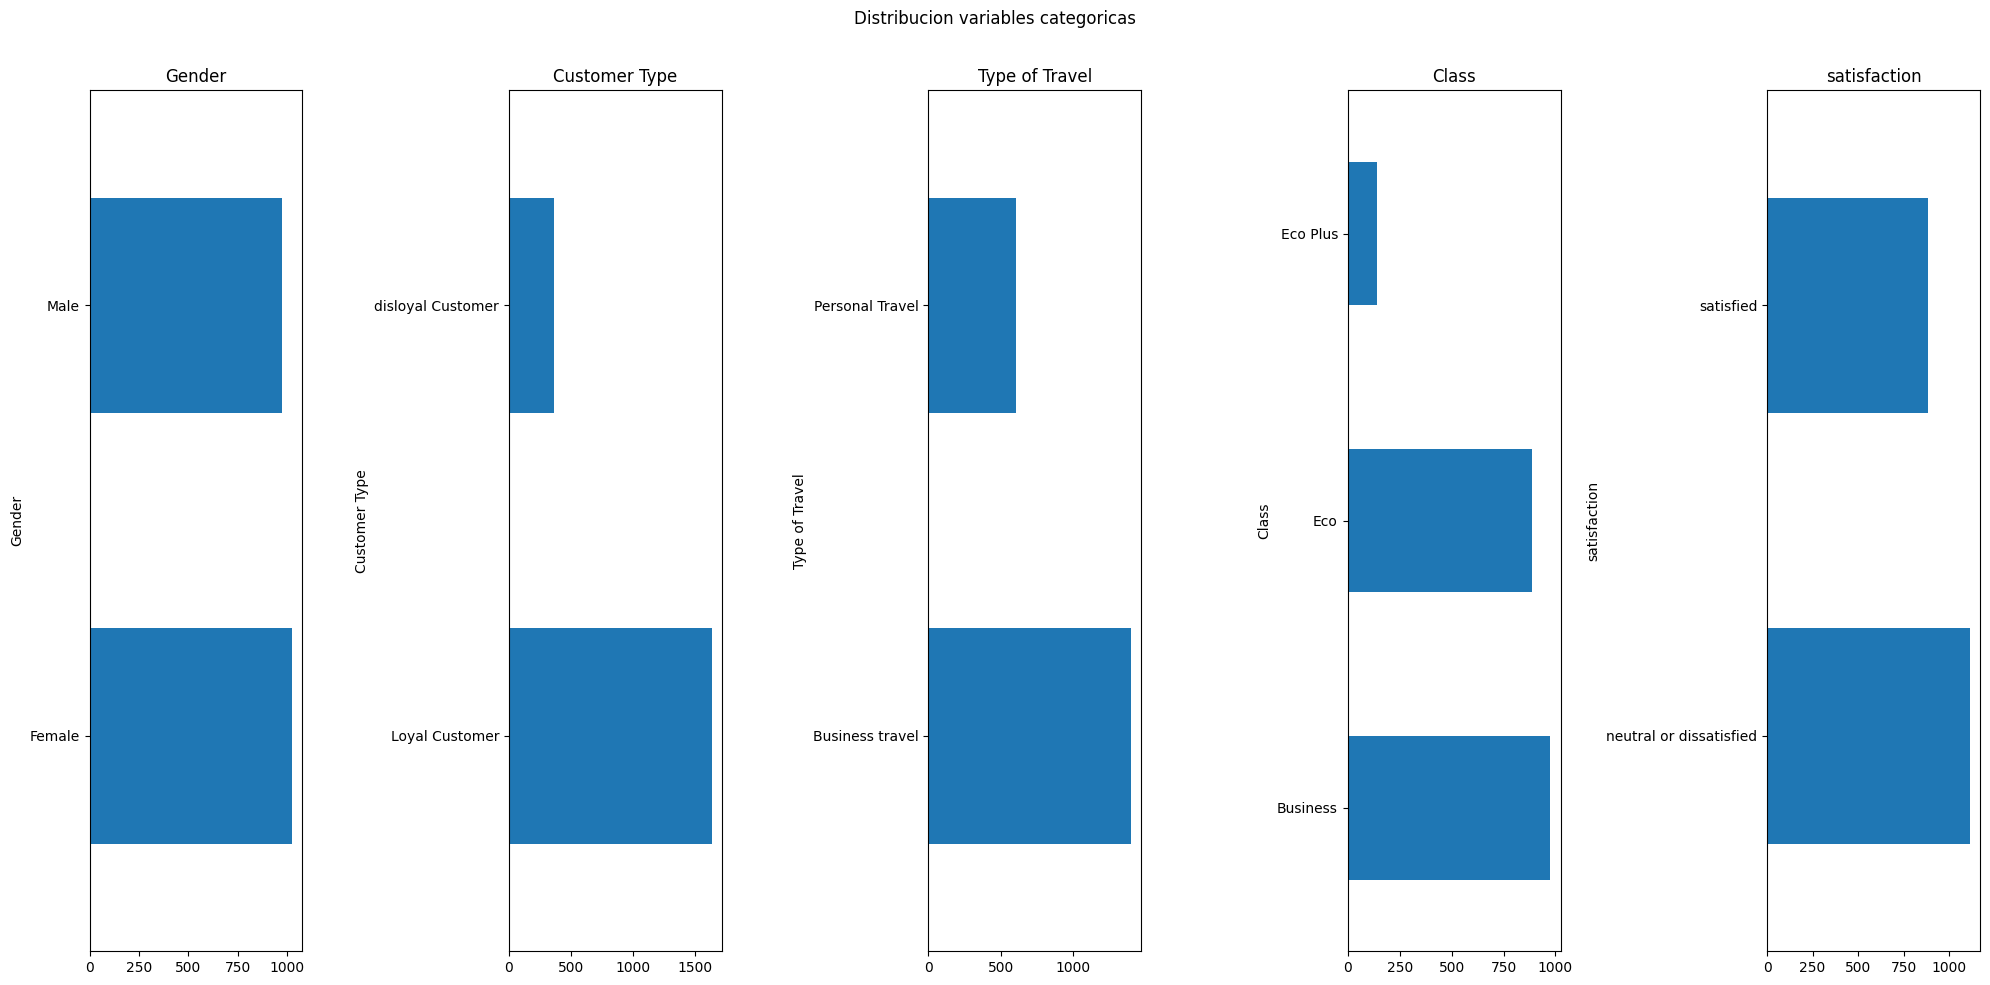

In [9]:
# Grafivo de variables categoricas
## Grafico de barras de frecuencia
fig, ax = plt.subplots(1,5, figsize=(20,10))
ax= ax.flat
cat_col= data_mod.select_dtypes(include=['object']).columns
for i, col in enumerate(cat_col):
    data_mod[col].value_counts().plot.barh( ax=ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Distribucion variables categoricas')
plt.show()

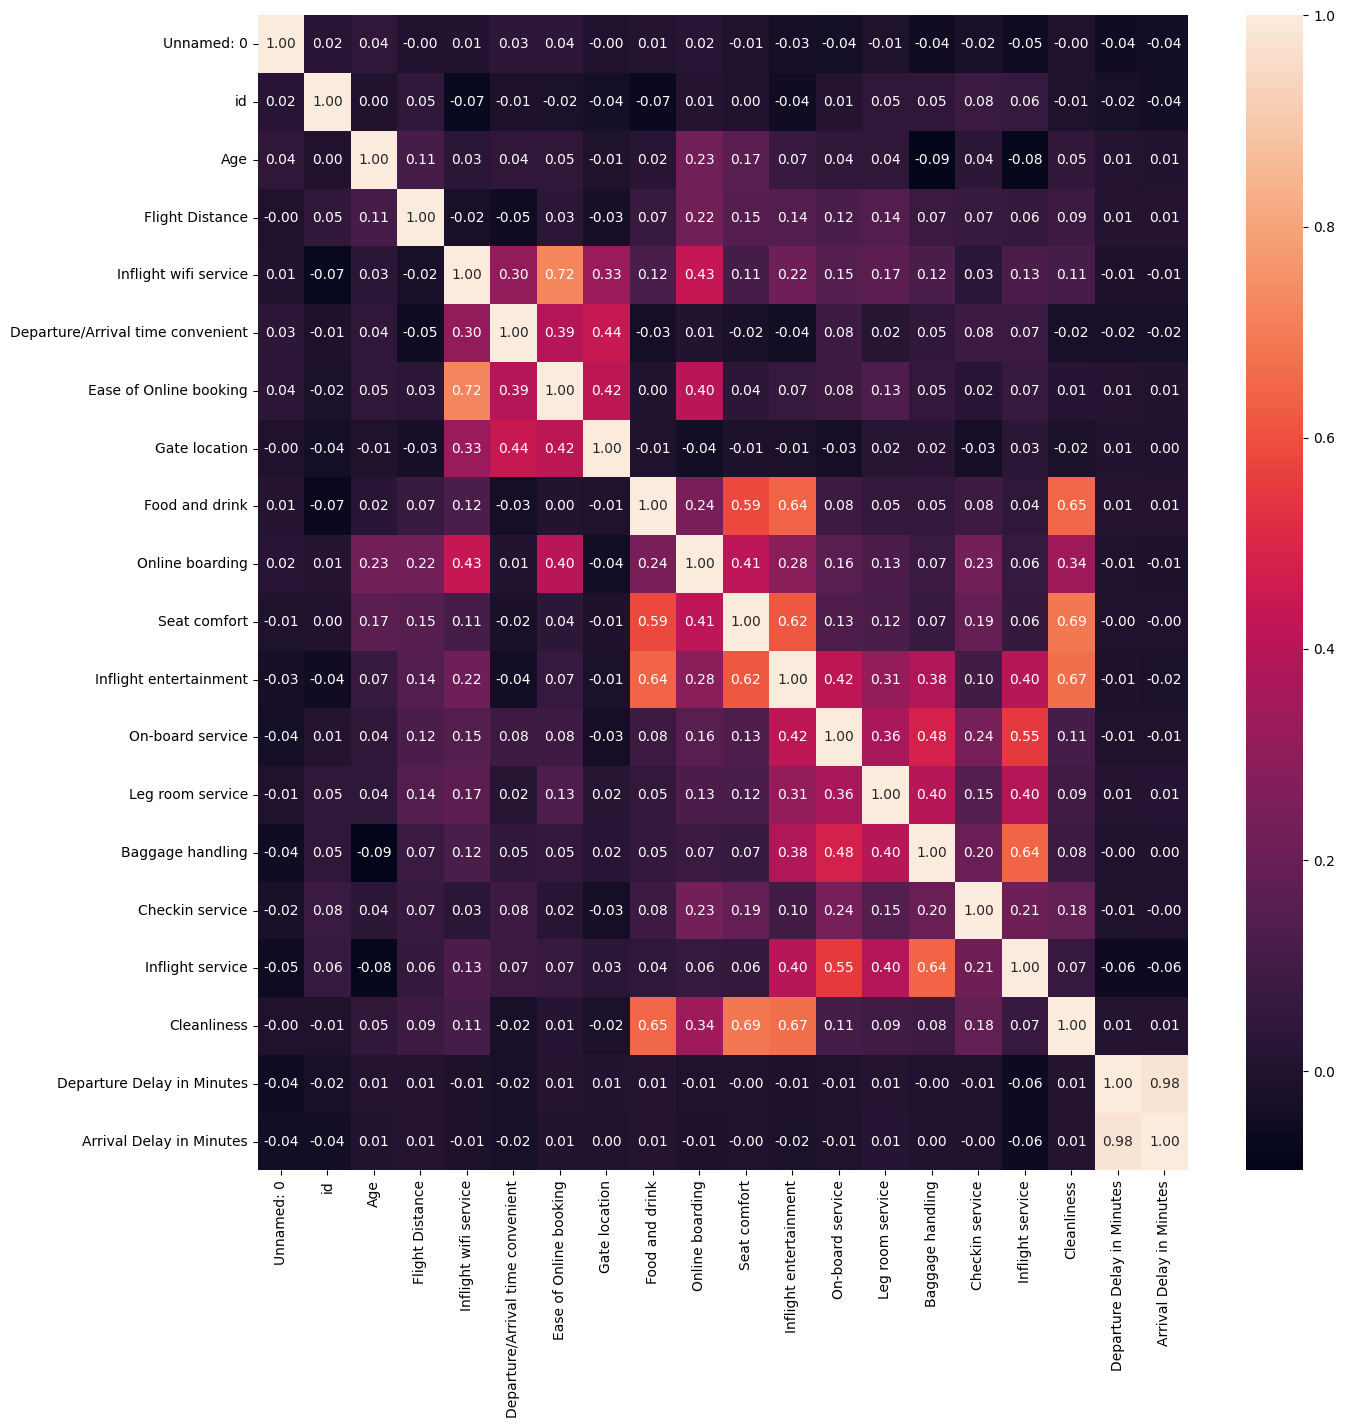

In [10]:
#Grarfico de correlacion de pearson
plt.figure(figsize=(15,15))
sb.heatmap(data_mod.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

## Preparacion de los datos
- Activar las desiciones toamdas en la exploracion
- Transformar variables numericas y categoricas oara ek diseño de modelos eficientes

In [11]:
data_mod=data_mod.drop(['Unnamed: 0', 'id', 'Departure Delay in Minutes', 'Customer Type', 'Arrival Delay in Minutes'], axis=1)
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 3706 to 97511
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             2000 non-null   object
 1   Age                                2000 non-null   int64 
 2   Type of Travel                     2000 non-null   object
 3   Class                              2000 non-null   object
 4   Flight Distance                    2000 non-null   int64 
 5   Inflight wifi service              2000 non-null   int64 
 6   Departure/Arrival time convenient  2000 non-null   int64 
 7   Ease of Online booking             2000 non-null   int64 
 8   Gate location                      2000 non-null   int64 
 9   Food and drink                     2000 non-null   int64 
 10  Online boarding                    2000 non-null   int64 
 11  Seat comfort                       2000 non-null   int64 
 12  Infligh

In [12]:
#Librerias para preparacion de datos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

#identificacion de la variables por tipo de dato
num_col = data_mod.select_dtypes(include=['float64','int64']).columns.to_list()
cat_col = data_mod.select_dtypes(include=['object']).columns.to_list()

#Definir los transformadores por tipo de dato
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

#sieñar el transformador de columnas
preperocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_col),
        ('cat', cat_transformer, cat_col)
    ],
    remainder='passthrough'
)
preperocessor



ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age', 'Flight Distance',
                                  'Inflight wifi service',
                                  'Departure/Arrival time convenient',
                                  'Ease of Online booking', 'Gate location',
                                  'Food and drink', 'Online boarding',
                                  'Seat comfort', 'Inflight entertainment',
                                  'On-board service', 'Leg room service',
                                  'Baggage handling', 'Checkin service',
                                  'Inflight service', 'Cleanliness']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Gender', 'Type of Travel', 'Class',
                                  'satisfaction'])])

In [13]:
data_prep = preperocessor.fit_transform(data_mod)
cod_cat = preperocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([num_col, cod_cat])
data_pro = pd.DataFrame(data_prep, columns=labels)
data_pro.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0.027778,0.292455,0.8,0.8,0.8,0.50,0.75,0.8,0.75,0.75,...,0.75,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.069444,0.108251,0.6,0.6,0.6,0.75,0.50,0.6,0.50,0.50,...,0.50,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.263889,0.032046,0.4,0.6,0.4,0.75,0.50,0.4,0.50,0.50,...,0.50,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.472222,0.379763,1.0,1.0,1.0,1.00,0.50,0.2,1.00,0.75,...,1.00,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.250000,0.261166,0.4,0.8,0.4,0.00,1.00,0.4,1.00,1.00,...,1.00,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Modelado
* Kmeans
* AgglomerativeClustering
* DBSCAN

**Kmenas**

- Busqueda de rango de grupos por codo
- Identificacion de la mejor cantidad de grupos por si


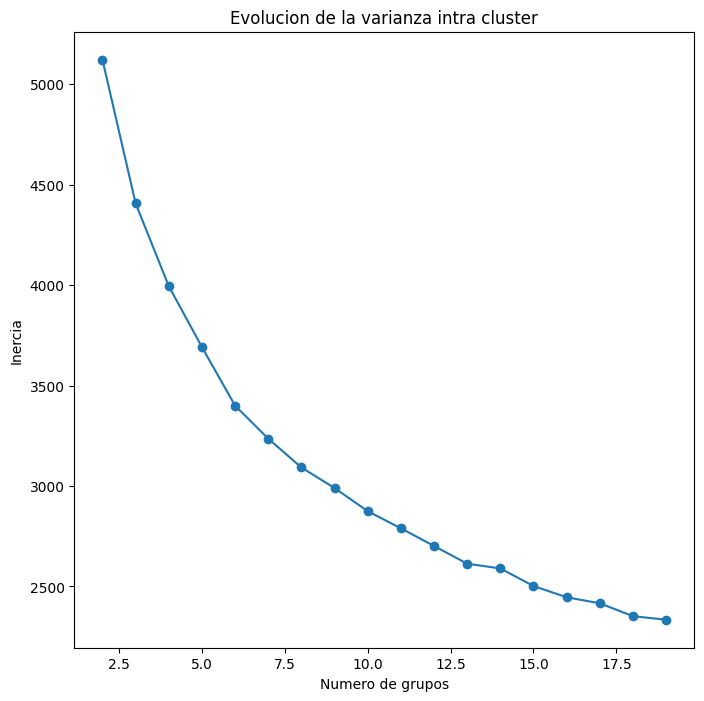

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 20)
inertias = []   

for n_clusters in range_n_clusters:
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=25, n_init=20)
    kmeans_model.fit(data_pro)
    inertias.append(kmeans_model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(range_n_clusters, inertias, marker='o')
plt.title('Evolucion de la varianza intra cluster')
plt.xlabel('Numero de grupos')
plt.ylabel('Inercia')
plt.show()

In [15]:
range_n_clusters = range(6,13)
sil_score=[]


for n_clusters in range_n_clusters:
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=25, n_init=20)
    kmeans_model.fit(data_pro)
    cluster_label=kmeans_model.fit_predict(data_pro)
    sil_avg = silhouette_score(data_pro, cluster_label)
    sil_score.append(sil_avg)




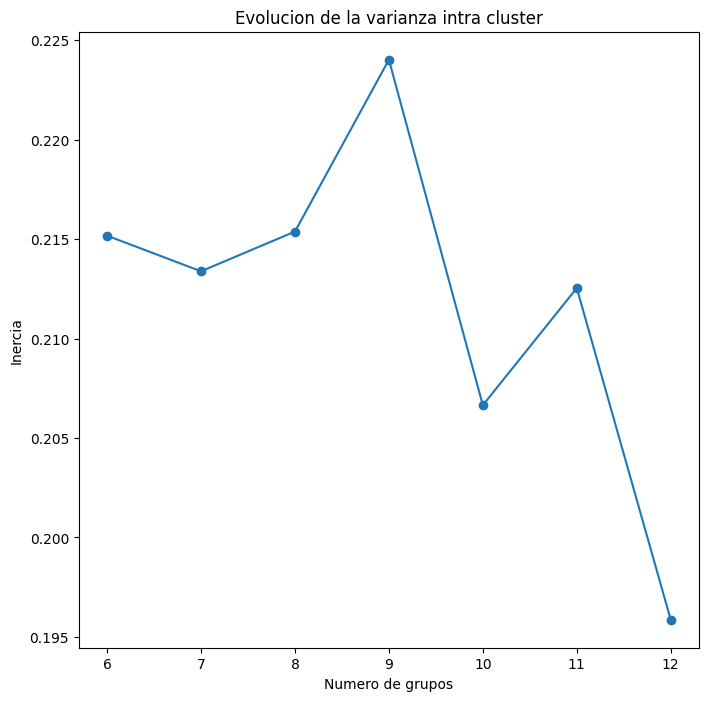

In [16]:
plt.figure(figsize=(8,8))
plt.plot(range_n_clusters, sil_score, marker='o')
plt.title('Evolucion de la varianza intra cluster')
plt.xlabel('Numero de grupos')
plt.ylabel('Inercia')
plt.show()

**Jerarquico Agloemrativo** 

* Mecanismo de asociacion
* Dendrograma

In [17]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

#Funcion oara dibujar dendrograma
def dibujar_dendrograma(model, **kwargs):
    counts  = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

In [18]:
keman_model = KMeans(n_clusters=8, random_state=25, n_init=20)
kmeans_model.fit(data_pro)

KMeans(n_clusters=12, n_init=20, random_state=25)

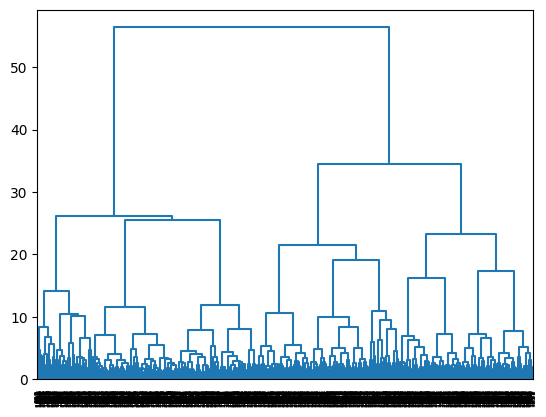

In [19]:
hclust = AgglomerativeClustering(metric='euclidean',
                                   linkage='ward',
                                   distance_threshold=0,
                                   n_clusters=None)
hclust.fit(data_pro)
dibujar_dendrograma(hclust, color_threshold=0) 

In [20]:
dendrogram_prun=30
dibujar_dendrograma(hclust,color_threshold=dendrogram_prun)
plt.axhline(y=dendrogram_prun, c='black', linestyle='--')
plt.show()

KeyboardInterrupt: 

In [ ]:
hclust= AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hclust.fit(data_pro)    

AgglomerativeClustering(n_clusters=3)

**DBSCAN**

- epsilon y las minimas muestras
- uso de vecinos cercanos

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product
from sklearn.metrics import silhouette_score  

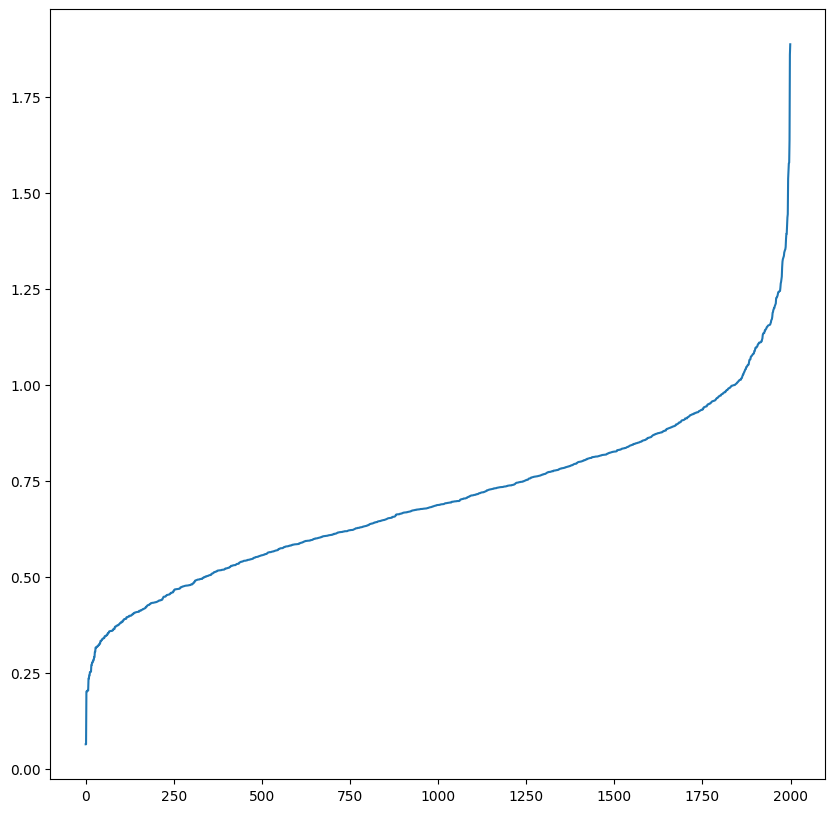

In [ ]:
# Identificar el rango de existencia de epsilon
neighbors= NearestNeighbors(n_neighbors=3)
neighbors_fit= neighbors.fit(data_pro)
distance,index= neighbors_fit.kneighbors(data_pro)
distance= np.sort(distance, axis=0)
distance= distance[:,1]
plt.figure(figsize=(10,10))
plt.plot(distance)
plt.show()

In [ ]:
eps_value=np.arange(1.0,1.8,0.1)
min_samples=np.arange(2,10)
dbscan_params= list(product(eps_value, min_samples))
sil_score=[]
for p in dbscan_params:
    label=DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(data_pro)
    sil_score.append(silhouette_score(data_pro, label))


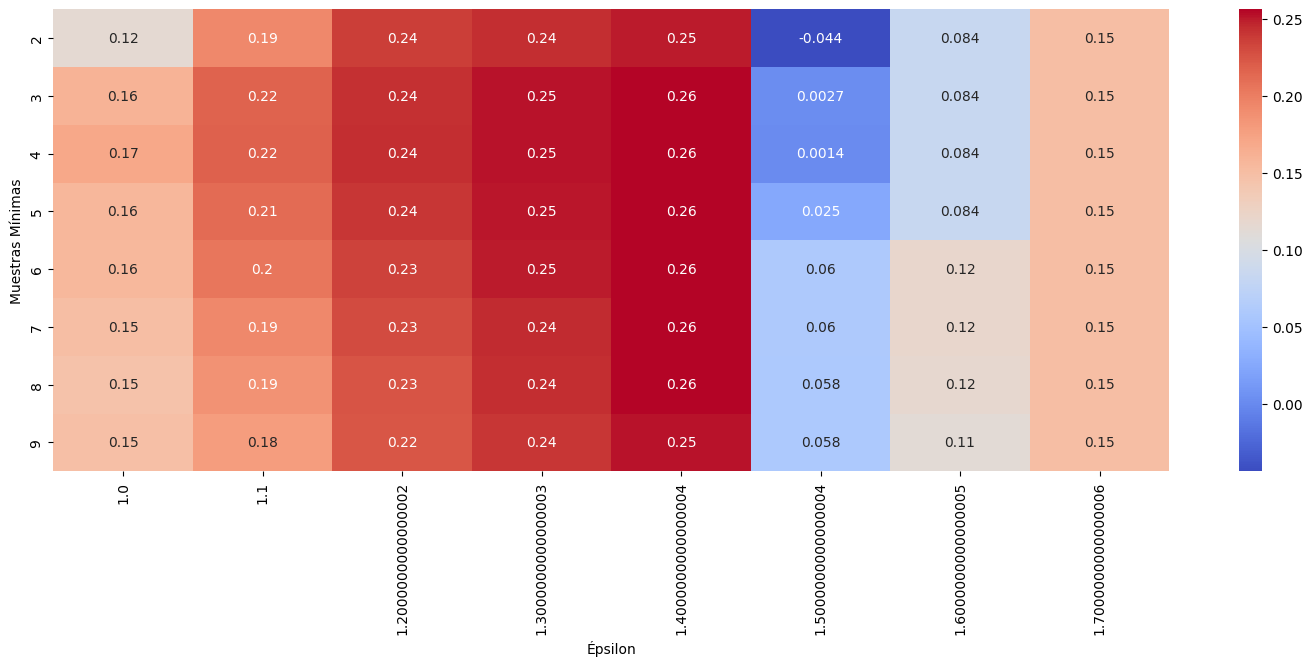

In [ ]:
# Heat map
dbscan_params_adj=pd.DataFrame.from_records(dbscan_params, columns=['Épsilon','Muestras Mínimas'])
dbscan_params_adj['Score']=sil_score
pivot_data=pd.pivot_table(dbscan_params_adj, values='Score', index='Muestras Mínimas', columns='Épsilon')
plt.figure(figsize=(18,6))
sb.heatmap(pivot_data, annot=True, fmt='.2g',cmap='coolwarm')
plt.show()

In [ ]:
dbscan_model= DBSCAN(eps=1.4, min_samples=3)

7. Evaclaucion del model

In [ ]:
label_kmeans= kmeans_model.fit_predict(data_pro)
label_hclust= hclust.fit_predict(data_pro)
label_dbscan= dbscan_model.fit_predict(data_pro)

In [ ]:
sil_kmeans=silhouette_score(data_pro, label_kmeans)
sil_agg=silhouette_score(data_pro, label_hclust)
sil_dbscan=silhouette_score(data_pro, label_dbscan)

print('Silhouette Kmeans: ', sil_kmeans)
print('Silhouette Agglomerative: ', sil_agg)
print('Silhouette DBSCAN: ', sil_dbscan)

Silhouette Kmeans:  0.20647030158933669
Silhouette Agglomerative:  0.2034461447789612
Silhouette DBSCAN:  0.2559569448662753


In [ ]:
np.unique(label_dbscan)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22])

In [ ]:
data_grupos=data_pro.copy()
data_grupos['Kmeans']=label_kmeans
data_grupos['Agglomerative']=label_hclust
data_grupos['DBSCAN']=label_dbscan


In [ ]:
data_grupos.Kmeans.value_counts()

Kmeans
7     335
6     221
2     212
3     179
8     171
1     168
9     163
5     135
11    111
4     111
0     101
10     93
Name: count, dtype: int64

In [ ]:
data_grupos.Agglomerative.value_counts()

Agglomerative
0    881
1    585
2    534
Name: count, dtype: int64

In [ ]:
data_grupos.DBSCAN.value_counts()

DBSCAN
 4     333
 3     330
 0     215
 9     209
 5     161
 10    151
 12    111
 7     109
 14     64
 13     52
 1      32
 17     29
 20     28
 18     27
 6      25
 2      23
 15     22
 11     19
 19     16
 16     16
-1      16
 8       4
 21      4
 22      4
Name: count, dtype: int64